## Import module
Module dalam python tersedia untuk mempermudah pemrosesan data. Kali ini module yang digunakan adalah `numpy` dan `matplotlib` sebagai visualisasinya. Kita juga akan melakukan import fungsi untuk membaca file csv menggunakan `pandas`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from IPython.display import display
%matplotlib inline

Selanjutnya baca file CSV dengan menggunakan `read_csv`

In [7]:
tran = read_csv('transport.csv')
print(tran)

                  country              car   bus   rail
0  some more explanations   yada yada yada   NaN    NaN
1                  France             86.1   5.3    8.6
2                 Germany             85.2   7.1    7.7
3             Netherlands             86.4   4.6    9.0
4          United Kingdom             88.2   6.5    5.3


Bisa dilihat bahwa terdapat satu baris yang tidak dapat digunakan. Selain itu kita juga dapat melakukan beberapa penyesuaian dengan parameter:
- `skiprows` untuk menghilangkan beberapa baris awal
- `skipinitialspace` untuk menghilangkan spasi setelah delimiter (pemisah)
- `index_col` kolom untuk indeks

In [9]:
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

In [10]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


In [13]:
tran.head()

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


In [6]:
print('Names of columns:')
print(tran.keys())
for key in tran.keys():
    print(key)

Names of columns:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


In [7]:
print(tran.iloc[0, 1])  # gives the bus data for France
print(tran.iloc[1, 0])  # gives the car data for Germany
print(tran.iloc[2, 2])  # gives the rail data for Netherlands
print(tran.iloc[3])     # all data for United Kindom
print(tran.iloc[:, 1])  # all data for bus

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


In [8]:
print(tran.loc['France', 'bus'])
print(tran.loc['Germany', 'car'])
print(tran.loc['Netherlands', 'rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:, 'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


In [9]:
print(tran.loc[:,'car'])  # all rows of 'car' column
print(tran['car'])        # 'car' column 
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


In [10]:
print('maximum car travel percentage:', tran.car.max())
print('country with maximum car travel percentage:', tran.car.idxmax())
print('mean car travel percentage:', tran.car.mean())
print('all rail travel above 8 percent:')

maximum car travel percentage: 88.2
country with maximum car travel percentage: United Kingdom
mean car travel percentage: 86.475
all rail travel above 8 percent:


In [12]:
print(tran.rail[tran.rail > 8])

country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


In [13]:
print(tran.rail[tran.rail > 8].index.values)


['France' 'Netherlands']


In [14]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:', tran.public_transport.idxmax())

Country with largest percentage public transport: Germany


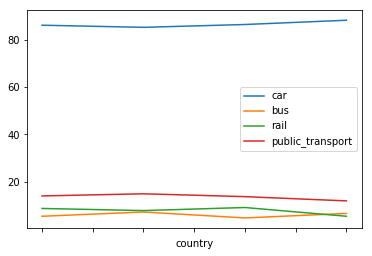

In [15]:
tran.plot()  # plot all columns

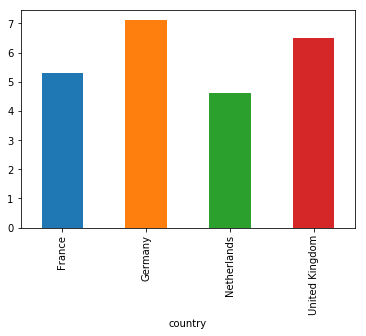

In [16]:
tran['bus'].plot(kind='bar')

In [17]:
print('Data sorted by car use:')
print(tran.sort_values('car'))
print('Data sorted by bus use:')
print(tran.sort_values('bus'))

Data sorted by car use:
                 car  bus  rail  public_transport
country                                          
Germany         85.2  7.1   7.7              14.8
France          86.1  5.3   8.6              13.9
Netherlands     86.4  4.6   9.0              13.6
United Kingdom  88.2  6.5   5.3              11.8
Data sorted by bus use:
                 car  bus  rail  public_transport
country                                          
Netherlands     86.4  4.6   9.0              13.6
France          86.1  5.3   8.6              13.9
United Kingdom  88.2  6.5   5.3              11.8
Germany         85.2  7.1   7.7              14.8


In [18]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Latihan

In [19]:
from pandas import read_csv
rain = read_csv('annual_precip.csv', skiprows=2, index_col=0)
#
print('First five lines of rain dataset:')
print(rain.head())
#
print()
print('Average annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year')
#
print()
print('Land area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2/year')
#
print()
print('Countries where average rainfall is below 200 mm/year')
print(rain[ rain.precip < 200 ])
#
print()
print('Countries where average rainfall is above 2500 mm/year')
print(rain[ rain.precip > 2500 ])
#
print()
print('Countries with almost the same rainfall as Netherlands')
print(rain[abs(rain.loc['Netherlands','precip'] - rain.precip) < 50])

First five lines of rain dataset:
                precip    area
country                       
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5

Average annual rainfall in Panama is 2692.0 mm/year

Land area of the Netherlands is 33.7 thousand km^2/year

Countries where average rainfall is below 200 mm/year
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.            167.0 

Country with largest influx of rain
Brazil 15074.6508 km^3 per year

                    precip     area      totalq
country                                        
Brazil              1782.0   8459.4  15074.6508
Russian Federation   460.0  16376.9   7533.3740
United States        715.0   9147.4   6540.3910
China                645.0   9327.5   6016.2375
Indonesia           2702.0   1811.6   4894.9432


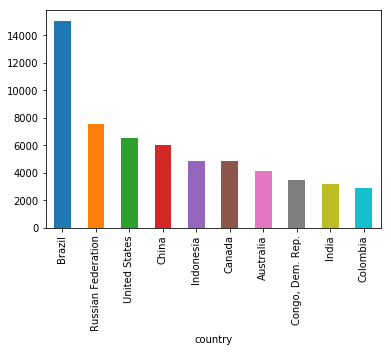

In [22]:
rain['totalq'] = rain.precip * rain.area * 1e-3
print('Country with largest influx of rain')
print(rain.totalq.idxmax(), rain.totalq.max(), 'km^3 per year')
#
print()
rain.sort_values('totalq', ascending=False, inplace=True)
print(rain[:5])
#
# rain.totalq[:10].plot(kind='bar')
rain.totalq[:10].plot(kind='bar')

Maximum daily rainfall 22.4
Date of maximum daily rainfall 2012-12-22 00:00:00


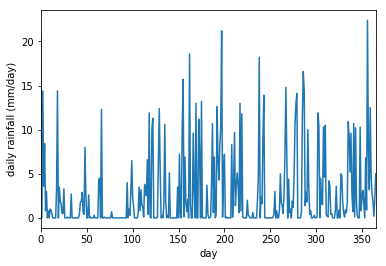

In [24]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], skipinitialspace=True)
# convert to mm/d
rain.iloc[:,2] = rain.iloc[:,2] * 0.1
# set negative values to zero
rain.loc[rain.RH < 0, 'RH'] = 0
rain.RH.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.xlim(0, 365)
print('Maximum daily rainfall', rain.RH.max())
print('Date of maximum daily rainfall', rain.YYYYMMDD[rain.RH.idxmax()])

[  83.    24.3   21.9   57.6   76.5  119.   121.6   93.4   52.   132.6
   63.3  149.5]


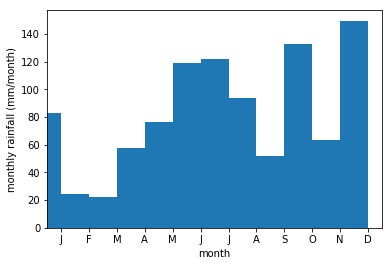

In [25]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month - 1] += rain.iloc[i, 2]
print(monthlyrain)
#
plt.bar(np.arange(12), monthlyrain, width=1)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
plt.xticks(np.arange(12) + 0.5, ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.xlim(0, 12);


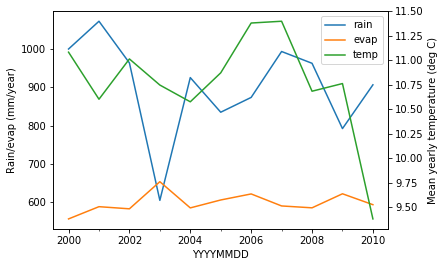

In [26]:
weather = read_csv('rotterdam_weather_2000_2010.txt', skiprows=11,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD', skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.loc[weather.RH < 0, 'RH'] = 0
yearly_rain = weather.RH.resample('A', kind='period').sum()
yearly_evap = weather.EV24.resample('A', kind='period').sum()
yearly_temp = weather.TG.resample('A', kind='period').mean()
ax1 = yearly_rain.plot()
ax1 = yearly_evap.plot()
plt.ylabel('Rain/evap (mm/year)')
ax2 = yearly_temp.plot(secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Mean yearly temperature (deg C)')
plt.legend(ax1.get_lines() + ax2.get_lines(),
           ['rain', 'evap', 'temp'], loc='best');